In [1]:
import pandas as pd
from sqlalchemy import create_engine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Connect to the SQLite database
database_name = "data/CompanyData.sqlite"
engine = create_engine(f"sqlite:///{database_name}", echo=False)

In [3]:
# Load the Master file from the database
master_df = pd.read_sql_query("SELECT * FROM MasterData_ML", engine)
master_df.dropna(inplace=True)
master_df.head()

,monthend_date,ticker,price,wealth_index,end_wealth_index,total_return,cash,st_debt,lt_debt,equity,...,ebit_ev,name,sector,quantile_total_return,price_1_month_ago,price_3_months_ago,price_12_months_ago,trailing_1_month_return,trailing_3_month_return,trailing_12_month_return
0,2016-04-30,A,40.92,39.6930,44.5140,12.145718,1.931000e+09,80000000.0,1.653000e+09,4.045000e+09,...,0.041902,Agilent Technologies Inc,Health Care,1,39.85,37.65,41.37,2.685069,8.685259,-1.087745
1,2016-05-31,A,45.89,44.5140,43.1432,-3.079481,1.931000e+09,80000000.0,1.653000e+09,4.045000e+09,...,0.037304,Agilent Technologies Inc,Health Care,3,40.92,37.35,41.19,12.145650,22.864793,11.410537
2,2016-06-30,A,44.36,43.1432,46.7904,8.453708,2.139000e+09,235000000.0,1.654000e+09,4.162000e+09,...,0.040637,Agilent Technologies Inc,Health Care,1,45.89,39.85,38.58,-3.334060,11.317440,14.981856
3,2016-07-31,A,48.11,46.7904,45.6913,-2.348986,2.139000e+09,235000000.0,1.654000e+09,4.162000e+09,...,0.037419,Agilent Technologies Inc,Health Care,3,44.36,40.92,40.95,8.453562,17.570870,17.484737
4,2016-08-31,A,46.98,45.6913,45.9121,0.483243,2.139000e+09,235000000.0,1.654000e+09,4.162000e+09,...,0.038333,Agilent Technologies Inc,Health Care,2,48.11,45.89,36.31,-2.348784,2.375245,29.385844


In [4]:
# Encode the sector names
y = master_df["sector"]
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [5]:
# Select the columns of interest
cols = ["earnings_yield","book_yield","revenue_ev","ebit_ev","net_debt_capital"]
X = master_df[cols]
X.head()

,earnings_yield,book_yield,revenue_ev,ebit_ev,net_debt_capital
0,3.347996,29.720034,0.301215,0.041902,-5.146868
1,2.985400,26.501281,0.268164,0.037304,-5.146868
2,3.133454,28.369886,0.284040,0.040637,-6.390593
3,2.889212,26.158556,0.261547,0.037419,-6.390593
4,2.958706,26.787742,0.267941,0.038333,-6.390593


In [12]:
# Split the data by ticker symbol
tickers = master_df['ticker'].unique()
ticker_train, tickers_test = train_test_split(tickers)


487


In [6]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

k: 1, Train/Test Score: 1.000/0.762
k: 3, Train/Test Score: 0.855/0.650
k: 5, Train/Test Score: 0.768/0.608
k: 7, Train/Test Score: 0.712/0.586
k: 9, Train/Test Score: 0.671/0.576
k: 11, Train/Test Score: 0.645/0.556
k: 13, Train/Test Score: 0.625/0.544
k: 15, Train/Test Score: 0.610/0.534
k: 17, Train/Test Score: 0.596/0.524
k: 19, Train/Test Score: 0.584/0.518


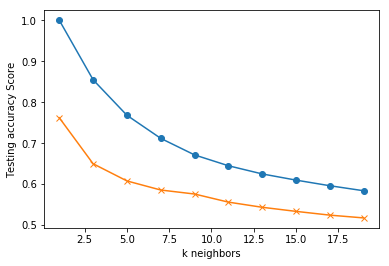

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
n_runs = 20
for k in range(1, n_runs, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, n_runs, 2), train_scores, marker='o')
plt.plot(range(1, n_runs, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Note that k: 1 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.762
